#  <span style="color:Black">Intrinsic dimension, $\mathcal{D}_{\text{int}}$, across MBL phase-transition</span>
<img src="figures/2nn_MBL_all.png"
     alt="Markdown Monster icon"
     style="float: right; margin-right: 100px;"
     width="50%"/>
This notebook contains dimension analysis of the many-body localization (MBL) transition via two-nearest-neighbours (2NN). The notebook is split into parts as delineated in the contents section below.

1. **Generating data**
1. **Weight distribution within eigenvectors**
1. **2NN**
    1. Single
    1. Many
    1. Average
    1. Scaling collapse
1. **Data from Cluster**
    1. Many
    1. Scaling collapse

In [1]:
# packages
import numpy as np  # matrix and vector operations
import matplotlib.pyplot as plt  # visualization
import fssa  # scaling collapse 
from utils_paper import *  # all things ID of MBL

## 1. Generating data

In [2]:
Ls, seeds, location = [8,10,12], 10, 'data'
L = Ls[0]

# disorder levels
min_disorder, max_disorder, steps = 0.5, 5.5, 11
ws=np.linspace(min_disorder, max_disorder, steps)

'''to generate data: uncomment the line below 👇'''
#[buildDiagSave(L, seeds, min_disorder, max_disorder, steps, method = 'dense', location = 'data') for L in Ls]

'to generate data: uncomment the line below 👇'

## 2. EigenComponent Dominance
We may investigate whether there is a change in intrinsic dimension across the phase transition by looking at the weight distribution within eigenvectors. A decrease in intrinsic dimension is indicated by a consolidation of weight in an eigenvector.

In [16]:
means, maxs, lims = eigenC_analysis(num_lims=8, seeds=seeds, L=L,
                                    min_disorder=min_disorder, max_disorder=max_disorder, steps=steps)
eigenC_plots(means=means[::-1], maxs=maxs, lims=lims[::-1], seeds=seeds,L=L,
             colors = 'orange, lightblue, salmon, yellowgreen, grey, purple, green'.split(', ')[::-1],
             min_disorder=min_disorder, max_disorder=max_disorder, steps=steps)
plt.close()

## 3. 2NN
2NN is a neighbour graph algo. which determines the intrinsic dimension of a dataset -- when applied to a list of eigenvectors corresponding to one realization of a single disorder strength.

### A. Single

In [5]:
filename = location+'/results-L-{L}-W-{W}-seed-{seed}.npz'.format(L=10, W=ws[0], seed=0)
eigs = load_eigs(filename, 'vecs')
x,y,slope, quality = nn2(eigs, plot=True, return_xy=True)

plt.close()
slope, quality

(48.29472615432519, 1.0)

### B. Many

In [3]:
slope_and_quality = get_slope_loss_and_weight(ws=ws, seeds=seeds, L=L, location='data/')
plot_ID_weights(slope_and_quality, ws)

100%|██████████| 11/11 [00:05<00:00,  1.95it/s]


### C. Averaging
By performing 2NN on eigenvectors from many disorder strengths and averaging across many realization, we obtain a general trend. 

We can improve results by including a weight when averaging. The weight is determined by the quality of individual 2NN fits.

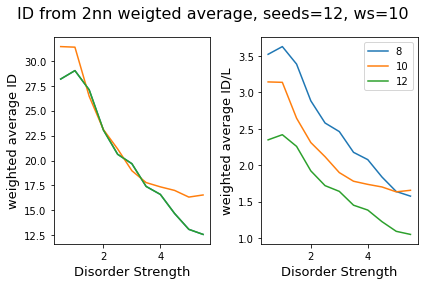

In [10]:
weighted_averages = []
for i in range(len(ws)):
    weighted_averages.append(weighted_average_m1(slope_and_quality[i,:,0], slope_and_quality[i,:,1]))
    
np.save('data/weighted_averages-L={}-seeds={}-ws={}.npy'.format(L,seeds,len(ws)),weighted_averages, allow_pickle=True)


fig, ax = plt.subplots(1,2)
for L in Ls:
    ax[0].plot(ws,np.load('data/weighted_averages-L={}-seeds={}-ws={}.npy'.format(L,seeds,len(ws))), label=L)
    ax[1].plot(ws,np.load('data/weighted_averages-L={}-seeds={}-ws={}.npy'.format(L,seeds,len(ws)))/L, label=L)
plt.legend()
[ax[i].set_xlabel('Disorder Strength', fontsize=13) for i in range(2)]
ax[0].set_ylabel('weighted average ID', fontsize=13)
ax[1].set_ylabel('weighted average ID/L', fontsize=13)

fig.suptitle('ID from 2nn weigted average, seeds={}, ws={}'.format(L,seeds,len(ws)), fontsize=16)
plt.tight_layout()
plt.show()

### D. Scaling collapse
To obtain the critical disorder strength, we may collapse our data from different L's
see: https://pyfssa.readthedocs.io/en/stable/tutorial.html

/Users/antongolles/opt/anaconda3/lib/python3.7/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


autoscale done
Scale data done
Quality check done


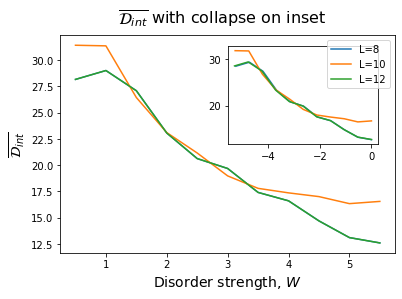

In [14]:
# Load data (weigted averages)
weighted_averages = []
for L in [8,10,12]:
    data = np.load('data/weighted_averages-L={}-seeds={}-ws={}.npy'.format(L,seeds,len(ws)))
    #plt.plot(ws,data, label=L)
    weighted_averages.append(data)
#print(weighted_averages)

weighted_averages = np.array(weighted_averages)
res = scale_collapse2(weighted_averages, ws), weighted_averages.shape

## 4. Data from cluster

### A. Many

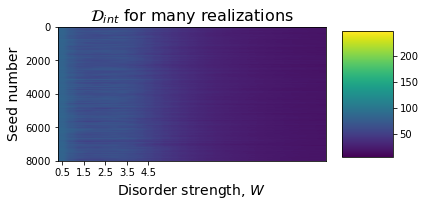

In [23]:
filename = 'fullresults/2nn-{}-combined.npy'.format(14)
data = np.load(filename)
data
plt.imshow(data,
           aspect=.5*data.shape[1]/data.shape[0],cmap = 'viridis', )
plt.colorbar(aspect=2.5)
plt.title('$\mathcal{D}_{int}$ for many realizations', fontsize=16)
plt.ylabel('Seed number', fontsize=14)
plt.xlabel('Disorder strength, $W$', fontsize=14)
plt.xticks(np.linspace(0,10,5), [ws[2*i] for i in range(5)])
plt.show()

/Users/antongolles/opt/anaconda3/lib/python3.7/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


autoscale done
Scale data done
Quality check done


           dnu: 0.5725504578352649
          drho: nan
         dzeta: 1.3306429065796352
        errors: array([       nan, 0.57255046, 1.33064291])
 final_simplex: (array([[3.66897213, 1.86019918, 1.97327581],
       [3.66841518, 1.85953833, 1.97397052],
       [3.66962034, 1.86067378, 1.97417861],
       [3.66901474, 1.86050872, 1.97426145]]), array([64.22751977, 64.23376596, 64.23390835, 64.23627157]))
           fun: 64.22751976517827
       message: 'Optimization terminated successfully.'
          nfev: 77
           nit: 35
            nu: 1.8601991763788952
           rho: 3.668972128953338
        status: 0
       success: True
         varco: array([[-0.00410222,  0.01737665,  0.05513824],
       [ 0.01737665,  0.32781403,  0.77032603],
       [ 0.05513824,  0.77032603,  1.77061054]])
             x: array([3.66897213, 1.86019918, 1.97327581])
          zeta: 1.9732758095851743

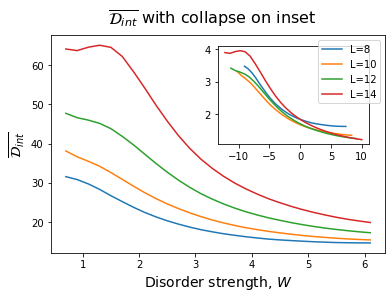

In [24]:
ws2 = np.linspace(0.1,6.1,31)
Ls = [8,10,12,14]
ID_mean = np.zeros((len(Ls),len(ws2)))
for index, L in enumerate(Ls):
    filename = 'fullresults/2nn-{}-combined.npy'.format(L)
    data = np.load(filename)
    averaged = np.mean(data,axis=0)
    ID_mean[index] = averaged
    
skip_init = 3
A = scale_collapse2(ID_mean[:,skip_init:], ws2[skip_init:], Ls)

plt.savefig('figures/collapsed.png', dpi=420)
A